# Plot Fig 2

## Hide or show code

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off the raw code."></form>''')

## Import packages

In [2]:
import matplotlib.pyplot as mp
import matplotlib.gridspec as gs
from matplotlib.image import imread
from matplotlib.lines import Line2D
from matplotlib.patches import ArrowStyle
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
import networkx as nx
import pickle as pc
from pyabc import History
import scipy as sp
import numpy as np

## Read data

In [3]:
# Logistic growth, death, and immigration

# Load data (parameters, simulations, and inference)
with open('../data/logistic/simulation_parameters.pickle', 'rb') as f: 
    logistic_sim_par = pc.load(f)
n_types = logistic_sim_par['n_types']
sampling_times_logistic = logistic_sim_par['sampling_times']
N = logistic_sim_par['N']
gR_log = logistic_sim_par['gR']
dR = logistic_sim_par['dR']
mR = logistic_sim_par['mR']

with open('../data/logistic/simulation_abs_abund.pickle', 'rb') as f: 
    logistic_sim_abs_abund = pc.load(f)
logistic_data_abs_abund = logistic_sim_abs_abund['data']["moments"]
logistic_numerics_abs_abund = logistic_sim_abs_abund['numerics']['moments']
    
with open('../data/logistic/simulation_rel_abund.pickle', 'rb') as f: 
    logistic_sim_rel_abund = pc.load(f)
logistic_data_rel_abund = logistic_sim_rel_abund['data']["moments"]
logistic_numerics_rel_abund = logistic_sim_rel_abund['numerics']['moments']
logistic_data_mSigma = logistic_sim_rel_abund['m_Sigma']
    
with open('../data/logistic/inference_parameters.pickle', 'rb') as f:
    logistic_inf_par =  pc.load(f)
logistic_priors_dict = logistic_inf_par['priors_dict']

logistic_history_abs_abund = History("sqlite:///../data/logistic/inference_abs_abund.db")

# Lotka - Volterra

# Load data (parameters, simulations, and inference)
with open('../data/LV/simulation_parameters.pickle', 'rb') as f: 
    LV_sim_par = pc.load(f)
sampling_times_LV = LV_sim_par['sampling_times']
gR_LV = LV_sim_par['gR']
I = LV_sim_par['I']

with open('../data/LV/simulation_abs_abund.pickle', 'rb') as f: 
    LV_sim_abs_abund = pc.load(f)
LV_data_abs_abund = LV_sim_abs_abund['data']["moments"]
LV_numerics_abs_abund = LV_sim_abs_abund['numerics']['moments']
    
with open('../data/LV/simulation_rel_abund.pickle', 'rb') as f: 
    LV_sim_rel_abund = pc.load(f)
LV_data_rel_abund = LV_sim_rel_abund['data']["moments"]
LV_numerics_rel_abund = LV_sim_rel_abund['numerics']['moments']
LV_data_mSigma = LV_sim_rel_abund['m_Sigma']
    
with open('../data/LV/inference_parameters.pickle', 'rb') as f:
    LV_inf_par =  pc.load(f)
LV_priors_dict = LV_inf_par['priors_dict']

LV_history_abs_abund = History("sqlite:///../data/LV/inference_abs_abund.db")

## Plot and save figure

/var/folders/h6/yw_4_mmn4rs3chq663c1q5qm0000gp/T/ipykernel_83046/1018341676.py:491: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mp.tight_layout()


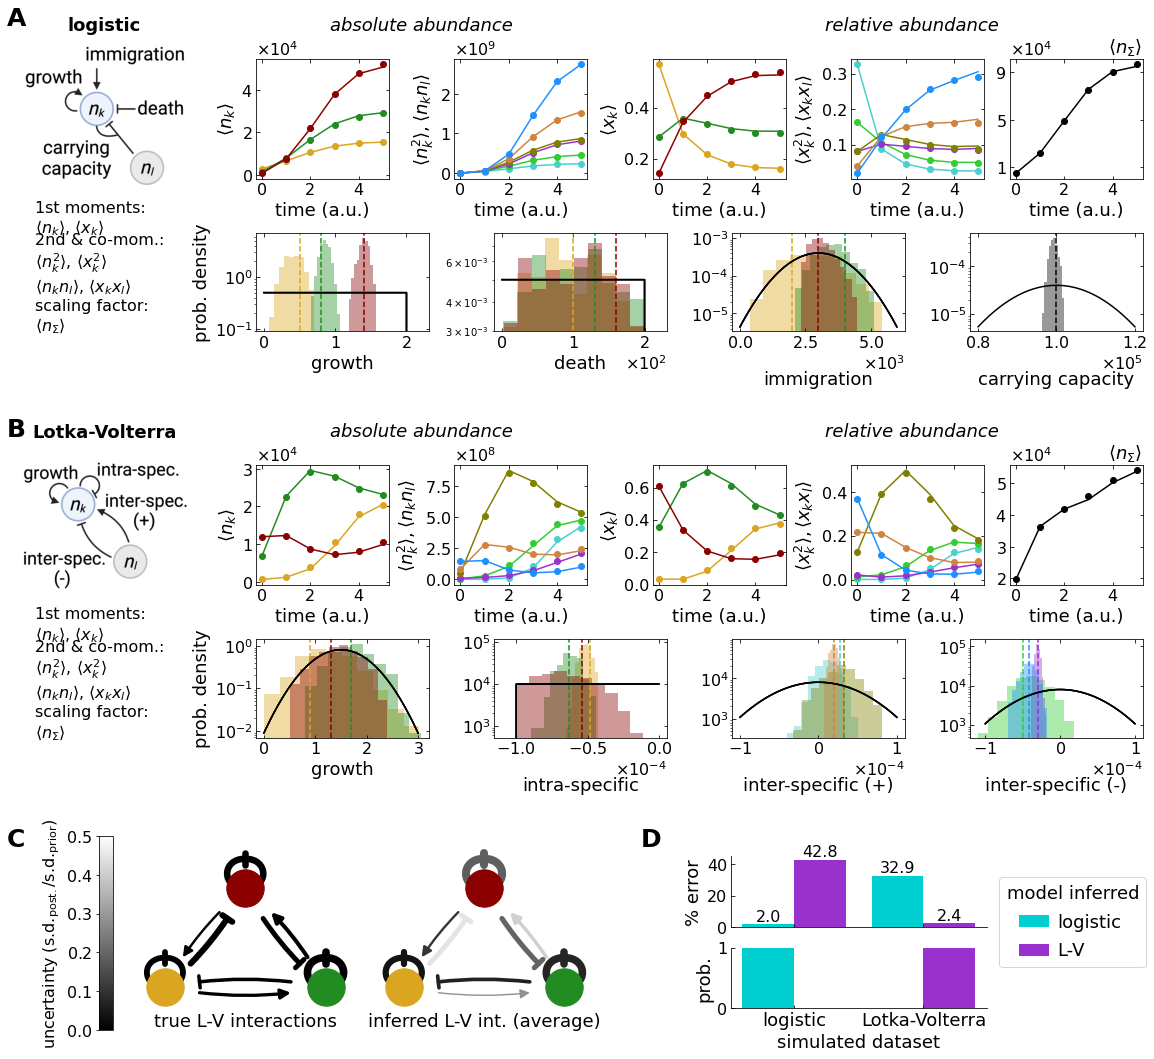

In [4]:
# Make figure
fig = mp.figure(figsize=(16, 15))

## Create top panels (Fig 2A - logistic model dynamics and inference)
gs0 = gs.GridSpec(8, 29, figure=fig)

gsA = gs0[:3,:].subgridspec(16, 29)

axA00 = fig.add_subplot(gsA[2:10, :5])

axA01 = fig.add_subplot(gsA[3:9, 6:10])
axA02 = fig.add_subplot(gsA[3:9, 11:15])
axA03 = fig.add_subplot(gsA[3:9, 16:20])
axA04 = fig.add_subplot(gsA[3:9, 21:25])
axA05 = fig.add_subplot(gsA[3:9, 25:])

axA10 = fig.add_subplot(gsA[11:, 6:11])
axA11 = fig.add_subplot(gsA[11:, 12:17])
axA12 = fig.add_subplot(gsA[11:, 18:23])
axA13 = fig.add_subplot(gsA[11:, 24:])

# Add text to explain the mathematical notation
axA1 =  fig.add_subplot(gsA[11:, :5])
axA1.text(0.1, 1., '1st moments:\n'+r'$\langle n_k \rangle$, $\langle x_k \rangle$', fontsize = 16)
axA1.text(0.1, 0.4, '2nd & co-mom.:\n'+r'$\langle n_k^2 \rangle$, $\langle x_k^2 \rangle$'+'\n'+r'$\langle n_k n_l \rangle$, $\langle x_k x_l \rangle$', fontsize = 16)
axA1.text(0.1, 0, 'scaling factor:\n'+r'$\langle n_\Sigma \rangle$', fontsize = 16)

# Choose colours for the figure
colors_1 = ['goldenrod', 'forestgreen', 'darkred']
colors_2 = ['mediumturquoise', 'limegreen', 'darkorchid', 'olive', 'peru', 'dodgerblue']

# Import diagram of the variables
diagram_2A = imread('fig2A_diagram.png')
axA00.imshow(diagram_2A)

# Plot First Moments of absolute and relative abudance
for i in range(n_types):
    
    axA01.plot(sampling_times_logistic, logistic_data_abs_abund[:, i], 'o', color = colors_1[i])
    axA01.plot(sampling_times_logistic, logistic_numerics_abs_abund[:, i], '-', color = colors_1[i])
    
    axA03.plot(sampling_times_logistic, logistic_data_rel_abund[:, i], 'o', color = colors_1[i])
    axA03.plot(sampling_times_logistic, logistic_numerics_rel_abund[:, i], '-', color = colors_1[i])

# Plot 2nd and co-moments of absolute and relative abudance
c = 0
for i in [3, 4, 5, 7, 8, 11]:
    
    axA02.plot(sampling_times_logistic, logistic_data_abs_abund[:, i], 'o', color = colors_2[c])
    axA02.plot(sampling_times_logistic, logistic_numerics_abs_abund[:, i], '-', color = colors_2[c])
    
    axA04.plot(sampling_times_logistic, logistic_data_rel_abund[:, i], 'o', color = colors_2[c])
    axA04.plot(sampling_times_logistic, logistic_numerics_rel_abund[:, i], '-', color = colors_2[c])
    
    c += 1

# Plot scaling factor
axA05.plot(sampling_times_logistic, logistic_data_mSigma, 'o', color = 'k')
axA05.plot(sampling_times_logistic, logistic_numerics_rel_abund[:, -1], '-', color = 'k')
axA05.set_yticks([1E4, 5E4, 9E4])

# Import inference posterior
logistic_posterior = logistic_history_abs_abund.get_distribution()[0]

# Plot posteriors, priors, and true values
for i in range(n_types):
    
    # Plot true values (Growth, Death, and Immigration Rate)
    axA10.axvline(gR_log[i], color = colors_1[i], linestyle='--')
    axA11.axvline(dR[i], color = colors_1[i], linestyle='--')
    axA12.axvline(mR[i], color = colors_1[i], linestyle='--')
    
    # Plot posteriors (Growth, Death, and Immigration Rate)
    axA10.hist(logistic_posterior.loc[:,'gR_%i'%i], color = colors_1[i], alpha = 0.4, density=True, bins = 10, log=True)
    axA11.hist(logistic_posterior.loc[:,'dR_%i'%i], color = colors_1[i], alpha = 0.4, density=True, bins = 10, log=True)
    axA12.hist(logistic_posterior.loc[:,'mR_%i'%i], color = colors_1[i], alpha = 0.4, density=True, bins = 10, log=True)
    
    # Plot priors (Growth Rate)
    prior = logistic_priors_dict['gR_%i'%i]
    x = np.linspace(0, 2.2, 100)
    if prior[0] == 'uniform':
        y = sp.stats.uniform.pdf(x, prior[1], prior[2])
    if prior[0] == 'norm':
        y = sp.stats.norm.pdf(x, prior[1], prior[2])
    axA10.plot(x, y, color='k', label = 'prior')
    
    # Plot priors (Death Rate)
    prior = logistic_priors_dict['dR_%i'%i]
    x = np.linspace(0, 220, 100)
    if prior[0] == 'uniform':
        y = sp.stats.uniform.pdf(x, prior[1], prior[2])
    if prior[0] == 'norm':
        y = sp.stats.norm.pdf(x, prior[1], prior[2])
    axA11.plot(x, y, color='k', label = 'prior')
    
    # Plot priors (Immigration Rate)
    prior = logistic_priors_dict['mR_%i'%i]
    x = np.linspace(0, 6000, 100)
    if prior[0] == 'uniform':
        y = sp.stats.uniform.pdf(x, prior[1], prior[2])
    if prior[0] == 'norm':
        y = sp.stats.norm.pdf(x, prior[1], prior[2])
    axA12.plot(x, y, color='k', label = 'prior')

axA10.set_ylim(ymin=9E-2)

# Plot true value and posterior (Carrying Capacity)
axA13.axvline(N, linestyle='--', color='k')
axA13.hist(logistic_posterior.loc[:,'N'], color = 'k', alpha = 0.4, density=True, bins = 10, log=True)

# Plot prior (Carrying Capacity)
prior = logistic_priors_dict['N']
x = np.linspace(8E4, 1.2E5, 100)
if prior[0] == 'uniform':
    y = sp.stats.uniform.pdf(x, prior[1], prior[2])
if prior[0] == 'norm':
    y = sp.stats.norm.pdf(x, prior[1], prior[2])
axA13.plot(x, y, color='k', label = 'prior')

## Create middle panels (Fig 2B - Lotka-Volterra model dynamics and inference)
gsB = gs0[3:6,:].subgridspec(16, 29)

axB00 = fig.add_subplot(gsB[2:10, :5])

axB01 = fig.add_subplot(gsB[3:9, 6:10])
axB02 = fig.add_subplot(gsB[3:9, 11:15])
axB03 = fig.add_subplot(gsB[3:9, 16:20])
axB04 = fig.add_subplot(gsB[3:9, 21:25])
axB05 = fig.add_subplot(gsB[3:9, 25:])

axB10 = fig.add_subplot(gsB[11:, 6:11])
axB11 = fig.add_subplot(gsB[11:, 12:17])
axB12 = fig.add_subplot(gsB[11:, 18:23])
axB13 = fig.add_subplot(gsB[11:, 24:])

# Add text to explain the mathematical notation
axB1 =  fig.add_subplot(gsB[11:, :5])
axB1.text(0.1, 1., '1st moments:\n'+r'$\langle n_k \rangle$, $\langle x_k \rangle$', fontsize = 16)
axB1.text(0.1, 0.4, '2nd & co-mom.:\n'+r'$\langle n_k^2 \rangle$, $\langle x_k^2 \rangle$'+'\n'+r'$\langle n_k n_l \rangle$, $\langle x_k x_l \rangle$', fontsize = 16)
axB1.text(0.1, 0, 'scaling factor:\n'+r'$\langle n_\Sigma \rangle$', fontsize = 16)

# Import diagram of the variables
diagram_2B = imread('fig2B_diagram.png')
axB00.imshow(diagram_2B)

# Plot First Moments of absolute and relative abudance
for i in range(n_types):
    
    axB01.plot(sampling_times_LV, LV_data_abs_abund[:, i], 'o', color = colors_1[i])
    axB01.plot(sampling_times_LV, LV_numerics_abs_abund[:, i], '-', color = colors_1[i])
    
    axB03.plot(sampling_times_LV, LV_data_rel_abund[:, i], 'o', color = colors_1[i])
    axB03.plot(sampling_times_LV, LV_numerics_rel_abund[:, i], '-', color = colors_1[i])

# Plot 2nd and co-moments of absolute and relative abudance
c = 0
for i in [3, 4, 5, 7, 8, 11]:

    axB02.plot(sampling_times_LV, LV_data_abs_abund[:, i], 'o', color = colors_2[c])
    axB02.plot(sampling_times_LV, LV_numerics_abs_abund[:, i], '-', color = colors_2[c])

    axB04.plot(sampling_times_LV, LV_data_rel_abund[:, i], 'o', color = colors_2[c])
    axB04.plot(sampling_times_LV, LV_numerics_rel_abund[:, i], '-', color = colors_2[c])
        
    c += 1

# Plot scaling factor
axB05.plot(sampling_times_LV, LV_data_mSigma, 'o', color = 'k')
axB05.plot(sampling_times_LV, LV_numerics_rel_abund[:, -1], '-', color = 'k')
axB05.set_yticks([2E4, 3E4, 4E4, 5E4])

# Import inference posterior
LV_posterior = LV_history_abs_abund.get_distribution()[0]

# Plot posteriors, priors, and true values
c = 0
for i in range(n_types):
    
    # Plot true values (Growth Rate)
    axB10.axvline(gR_LV[i], color = colors_1[i], linestyle='--')
    # Plot posteriors (Growth Rate)
    axB10.hist(LV_posterior.loc[:,'gR_%i'%i], color = colors_1[i], alpha = 0.4, density=True, bins = 10, log=True)

    for j in range(n_types):

        I_i_j = I[i,j]        
        
        # Intra-specific interactions
        if i == j:
            # Plot true values
            axB11.axvline(I_i_j, color = colors_1[i], linestyle='--')
            
            # Plot posteriors
            axB11.hist(LV_posterior.loc[:,'I_%i_%i'%(i,j)], color = colors_1[i], alpha = 0.4, density=True, bins = 10, log=True)

            # Plot priors
            prior = LV_priors_dict['I_%i_%i'%(i,j)]
            x = np.linspace(-1.1E-4, 0, 100)
            if prior[0] == 'uniform':
                y = sp.stats.uniform.pdf(x, prior[1], prior[2])
            if prior[0] == 'norm':
                y = sp.stats.norm.pdf(x, prior[1], prior[2])
            axB11.plot(x, y, color='k', label = 'prior')

        # Inter-specific interactions
        else:
            # Positive interactions
            if I_i_j > 0:
                # Plot true values
                axB12.axvline(I_i_j, color = colors_2[c], linestyle='--')
                
                # Plot posteriors
                axB12.hist(LV_posterior.loc[:,'I_%i_%i'%(i,j)], color = colors_2[c], alpha = 0.4, density=True, bins = 10, log=True)
                
                # Plot priors
                prior = LV_priors_dict['I_%i_%i'%(i,j)]
                x = np.linspace(-1E-4, 1E-4, 100)
                if prior[0] == 'uniform':
                    y = sp.stats.uniform.pdf(x, prior[1], prior[2])
                if prior[0] == 'norm':
                    y = sp.stats.norm.pdf(x, prior[1], prior[2])
                axB12.plot(x, y, color='k', label = 'prior')
            
            # Negative interactions
            elif I_i_j < 0:
                # Plot true values
                axB13.axvline(I_i_j, color = colors_2[c], linestyle='--')
                
                # Plot posteriors
                axB13.hist(LV_posterior.loc[:,'I_%i_%i'%(i,j)], color = colors_2[c], alpha = 0.4, density=True, bins = 10, log=True)
                
                # Plot priors
                prior = LV_priors_dict['I_%i_%i'%(i,j)]
                x = np.linspace(-1E-4, 1E-4, 100)
                if prior[0] == 'uniform':
                    y = sp.stats.uniform.pdf(x, prior[1], prior[2])
                if prior[0] == 'norm':
                    y = sp.stats.norm.pdf(x, prior[1], prior[2])
                axB13.plot(x, y, color='k', label = 'prior')
                
            c +=1
    
    # Plot priors (Growth Rate)
    prior = LV_priors_dict['gR_%i'%i]
    x = np.linspace(0, 3, 100)
    if prior[0] == 'uniform':
        y = sp.stats.uniform.pdf(x, prior[1], prior[2])
    if prior[0] == 'norm':
        y = sp.stats.norm.pdf(x, prior[1], prior[2])
    axB10.plot(x, y, color='k', label = 'prior')

## Create bottom left panels (Fig 2C - Interaction network reconstruction)
gsC = gs0[6:,:16].subgridspec(10, 44, hspace=0)

axC0 = fig.add_subplot(gsC[2:, 8:25])
axC1 = fig.add_subplot(gsC[2:, 25:-2])

# Create scale of intra- and inter-specific interactions magnitude
I_max = np.max(I)
I_norm_true = Normalize(vmin=0, vmax=abs(I_max))

# Compute mean and uncertainty of each interaction from their posterior
I_mean = np.zeros((n_types, n_types))
I_uncertainty = np.zeros((n_types, n_types))

for type_i in range(n_types):
    
    for type_j in range(n_types):
        
        I_mean[type_i,type_j] = np.mean(LV_posterior.loc[:,'I_%i_%i'%(type_i,type_j)])

        # Compute uncertainty of interactions
        I_sd_posterior = np.std(LV_posterior.loc[:,'I_%i_%i'%(type_i,type_j)])
        I_prior = LV_priors_dict['I_%i_%i'%(type_i,type_j)]
        if I_prior[0] == 'uniform':
            I_sd_prior = (I_prior[2] - I_prior[1]) / 2
        if I_prior[0] == 'norm':
            I_sd_prior = I_prior[2]
        I_uncertainty[type_i,type_j] = abs(I_sd_posterior / I_sd_prior)

# Create colorbar for uncertainty of interactions
I_uncertainty_norm_true = Normalize(vmin=0, vmax=0.5)
cmap_edge = mp.get_cmap('binary_r')
ax_cbar  = fig.add_axes([0.08,0.03,0.012,0.18])

cbar = ColorbarBase(ax_cbar, cmap=cmap_edge, norm=I_uncertainty_norm_true, orientation='vertical', ticklocation='left')
cbar.set_label('uncertainty (s.d.$_\mathrm{post.}$/s.d.$_\mathrm{prior}$)', fontsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.formatter.set_useMathText(True)
cbar.ax.yaxis.offsetText.set(size=16)

# Create graph of interactions (choose geometry and node colours)
G = nx.DiGraph()

pos = {0: (0, 0), 1: (0.5, 0), 2: (0.25, 0.5)}
node_colors = {0: 'goldenrod', 1: 'forestgreen', 2: 'darkred'}

# Draw each node and interaction
for type_i in range(n_types):
    
    # Draw each node
    G.add_node(type_i)
    
    nx.draw_networkx_nodes(G, pos, nodelist=[type_i], node_color=node_colors[type_i], node_size=1400, ax = axC0)
    nx.draw_networkx_nodes(G, pos, nodelist=[type_i], node_color=node_colors[type_i], node_size=1400, ax = axC1)
    
    # Draw each interaction connecting the node
    for type_j in range(n_types):
        
        # True network (find colour, thickness, arrow head and draw)
        color_edge_true = cmap_edge(0)
        thickness_edge_true = I_norm_true(abs(I[type_i,type_j]))
    
        if I[type_i,type_j] < 0:
            arrow_head_true = ArrowStyle.BarAB(widthA=0.0, angleA=0, widthB=0.3, angleB=0)
        else:
            arrow_head_true = ArrowStyle.CurveFilledB(widthA=0.0, angleA=0, widthB=0.3, angleB=0)
        
        nx.draw_networkx_edges(G, pos, edgelist=[(type_i,type_j)], connectionstyle='arc3, rad = 0.1', width=4*thickness_edge_true, arrowsize=20, min_source_margin = 35, min_target_margin = 35, ax = axC0, edge_color=color_edge_true, arrowstyle=arrow_head_true)
        
        # Inferred network (find colour, thickness, arrow head and draw)
        color_edge_inferred = cmap_edge(I_uncertainty_norm_true(I_uncertainty[type_i,type_j]))
        thickness_edge_inferred = I_norm_true(abs(I_mean[type_i,type_j]))
        
        if I_mean[type_i,type_j] < 0:
            arrow_head_inferred = ArrowStyle.BarAB(widthA=0.0, angleA=0, widthB=0.3, angleB=0)
        else:
            arrow_head_inferred = ArrowStyle.CurveFilledB(widthA=0.0, angleA=0, widthB=0.3, angleB=0)
                
        nx.draw_networkx_edges(G, pos, edgelist=[(type_i,type_j)], connectionstyle='arc3, rad = 0.1', width=4*thickness_edge_inferred, arrowsize=20, min_source_margin = 35, min_target_margin = 35, ax = axC1, edge_color=color_edge_inferred, arrowstyle=arrow_head_true)

## Create bottom right panels (Fig 2D - Interaction network reconstruction)
gsD = gs0[6:,17:-2].subgridspec(20, 20, hspace=0.)

axD0 = fig.add_subplot(gsD[5:12, 2:-4])
axD1 = fig.add_subplot(gsD[14:, 2:-4])

# Load errors and probabilities of each model
with open('../data/model_comparison/logistic_simulation_inference_errors_n_probabilities.pickle', 'rb') as f: 
    logistic_sim_eps_n_prob = pc.load(f)
logistic_sim_model_comparison_eps = logistic_sim_eps_n_prob['eps_models']
logistic_sim_model_comparison_prob = logistic_sim_eps_n_prob['prob_models']

with open('../data/model_comparison/LV_simulation_inference_errors_n_probabilities.pickle', 'rb') as f: 
    LV_sim_eps_n_prob = pc.load(f)
LV_sim_model_comparison_eps = LV_sim_eps_n_prob['eps_models']
LV_sim_model_comparison_prob = LV_sim_eps_n_prob['prob_models']

# Load model inference error
eps_logistic_data_logistic_model = logistic_sim_model_comparison_eps.loc['logistic (data)','logistic (model)']
eps_logistic_data_LV_model = logistic_sim_model_comparison_eps.loc['logistic (data)','LV (model)']
eps_LV_data_logistic_model = LV_sim_model_comparison_eps.loc['LV (data)','logistic (model)']
eps_LV_data_LV_model = LV_sim_model_comparison_eps.loc['LV (data)','LV (model)']

# Transformation to porcentage of error (i.e. relative to the data)
# For relative abundance data with 1st, 2nd and co-moments the total data amounts to exactly 2.
# The first moments add up to 1, the second and co-moments add up to 1.
eps_logistic_data_logistic_model = 100 * eps_logistic_data_logistic_model / 2.
eps_logistic_data_LV_model = 100 * eps_logistic_data_LV_model / 2.
eps_LV_data_logistic_model = 100. * eps_LV_data_logistic_model / 2.
eps_LV_data_LV_model = 100 * eps_LV_data_LV_model / 2.

# Load model probability after inference
prob_logistic_data_logistic_model = logistic_sim_model_comparison_prob.loc['logistic (data)','logistic (model)']
prob_logistic_data_LV_model = logistic_sim_model_comparison_prob.loc['logistic (data)','LV (model)']
prob_LV_data_logistic_model = LV_sim_model_comparison_prob.loc['LV (data)','logistic (model)']
prob_LV_data_LV_model = LV_sim_model_comparison_prob.loc['LV (data)','LV (model)']

# Draw error bars
index = np.arange(2)
bar_width = 0.4
# Logistic data
axD0_bars_0 = axD0.bar(index, [eps_logistic_data_logistic_model, eps_logistic_data_LV_model], bar_width, label='logistic', color='darkturquoise')
# Lotka-Volterra data
axD0_bars_1 = axD0.bar(index+bar_width, [eps_LV_data_logistic_model, eps_LV_data_LV_model], bar_width, label="L-V", color='darkorchid')
# Add number on top of bar
axD0.bar_label(axD0_bars_0, fmt = '%.1f', fontsize = 16)
axD0.bar_label(axD0_bars_1, fmt = '%.1f', fontsize = 16)

# Draw probability bars
# Logistic data
axD1.bar(index, [prob_logistic_data_logistic_model, prob_logistic_data_LV_model], bar_width, label='logistic', color='darkturquoise')
# Lotka-Volterra data
axD1.bar(index+bar_width, [prob_LV_data_logistic_model, prob_LV_data_LV_model], bar_width, label="L-V", color='darkorchid')

axD1.set_ylim(0,1)

# Annotate bars
axD0.set_xticks(index + bar_width / 2)
axD0.set_yticks([0,20,40])
axD1.set_xticks(index + bar_width / 2)
axD1.set_xticklabels(['logistic', 'Lotka-Volterra'], fontsize=18)

axD0.set_ylabel(r'% error', fontsize=18)
axD1.set_xlabel('simulated dataset', fontsize=18)
axD1.set_ylabel('prob.', fontsize=18)

axD0.tick_params(axis='both', direction='in',top=False, right=False, labelbottom=False)
axD1.tick_params(axis='both', direction='in',top=False, right=False)

# Add legend
ax_legend = fig.add_axes([0.875,0.08,0.1,0.1])
ax_legend.axis('off')
legC00 = ax_legend.legend([Line2D([0],[0],color='darkturquoise',lw=12), Line2D([0],[0],color='darkorchid',lw=12)], ['logistic', 'L-V'], loc='upper center', ncol=1, prop=dict(size=18), frameon=True, handletextpad=0.8, labelspacing=0.6, handlelength=1.)
legC00.set_title(title='model inferred', prop={'size': 18})

# Figure setups and annotations
for ax in [axA00, axA1, axB00, axB1]:
    ax.axis('off')
    
for ax in [axA01, axA02, axA03, axA04, axA05, axA10, axA11, axA12, axA13, axB01, axB02, axB03, axB04, axB05, axB10, axB11, axB12, axB13]:
    ax.tick_params(axis='both', direction='in',top=True, right=True)
    ax.xaxis.offsetText.set_fontsize(16)
    ax.yaxis.offsetText.set_fontsize(16)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)

for ax in [axA01, axA02, axA05, axB01, axB02, axB05]:
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    
for ax in [axA01, axA02, axA03, axA04, axA05, axB01, axB02, axB03, axB04, axB05]:
    ax.locator_params(axis='both', nbins=4)
    ax.set_xlabel('time (a.u.)', fontsize=18)

axB03.set_yticks([0,0.2,0.4,0.6])
axB10.set_xticks([0,1,2,3])

for ax in [axA10, axA11, axA12, axA13, axB10, axB11, axB12, axB13]:
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)

for ax in [axA10, axB10]:
    ax.set_ylabel("prob. density", fontsize=18)

for ax in [axA01, axB01]:
    ax.set_ylabel(r'$\langle n_k \rangle$', fontsize=18)#, loc='right'

for ax in [axA02, axB02]:
    ax.set_ylabel(r'$\langle n_k^2 \rangle,\langle n_k n_l \rangle$', fontsize=18)#, loc='right'
    
for ax in [axA05, axB05]:
    ax.set_title(r'$\langle n_\Sigma \rangle$', fontsize=18, loc='right')#
    
for ax in [axA03, axB03]:
    ax.set_ylabel(r'$\langle x_k \rangle$', fontsize=18)#, loc='right'
    
for ax in [axA04, axB04]:
    ax.set_ylabel(r'$\langle x_k^2 \rangle, \langle x_k x_l \rangle$', fontsize=18)#, loc='right'
    
for ax in [axA10, axB10]:
    ax.set_xlabel('growth', fontsize=18)

for ax in [axC0, axC1]:
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

axC0.set_xlabel('true L-V interactions', fontsize=18)
axC1.set_xlabel('inferred L-V int. (average)', fontsize=18)
    
for ax in [axD0, axD1]:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
        
for ax in [axD0, axD1]:
    ax.yaxis.set_tick_params(labelsize=16)
    ax.yaxis.offsetText.set(size=16)

axA11.set_xlabel('death', fontsize=18)
axA12.set_xlabel('immigration', fontsize=18, labelpad=20)
axA13.set_xlabel('carrying capacity', fontsize=18, labelpad=20)

axB11.set_xlabel('intra-specific', fontsize=18, labelpad=20)
axB12.set_xlabel('inter-specific (+)', fontsize=18, labelpad=20)
axB13.set_xlabel('inter-specific (-)', fontsize=18, labelpad=20)

axA00.set_title('logistic', weight='bold', fontsize=18)
axB00.set_title('Lotka-Volterra', weight='bold', fontsize=18)

mp.gcf().text(0.28, 0.956, "absolute abundance", style='italic', fontsize=18, rotation=0, color='k')
mp.gcf().text(0.71, 0.956, "relative abundance", style='italic', fontsize=18, rotation=0, color='k')
mp.gcf().text(0.28, 0.58, "absolute abundance", style='italic', fontsize=18, rotation=0, color='k')
mp.gcf().text(0.71, 0.58, "relative abundance", style='italic', fontsize=18, rotation=0, color='k')

# Annotate panels
mp.gcf().text(0., 0.96, "A", weight='bold', fontsize=25)
mp.gcf().text(0., 0.58, "B", weight='bold', fontsize=25)
mp.gcf().text(0., 0.2, "C", weight='bold', fontsize=25)
mp.gcf().text(0.55, 0.2, "D", weight='bold', fontsize=25)

# Save figure
mp.tight_layout()
mp.savefig('fig2.pdf', dpi=300, format='pdf')